In [8]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
data = pd.read_csv('fraudTest.csv')

In [10]:
data

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555714,555714,2020-12-31 23:59:07,30560609640617,fraud_Reilly and Sons,health_fitness,43.77,Michael,Olson,M,558 Michael Estates,...,40.4931,-91.8912,519,Town planner,1966-02-13,9b1f753c79894c9f4b71f04581835ada,1388534347,39.946837,-91.333331,0
555715,555715,2020-12-31 23:59:09,3556613125071656,fraud_Hoppe-Parisian,kids_pets,111.84,Jose,Vasquez,M,572 Davis Mountains,...,29.0393,-95.4401,28739,Futures trader,1999-12-27,2090647dac2c89a1d86c514c427f5b91,1388534349,29.661049,-96.186633,0
555716,555716,2020-12-31 23:59:15,6011724471098086,fraud_Rau-Robel,kids_pets,86.88,Ann,Lawson,F,144 Evans Islands Apt. 683,...,46.1966,-118.9017,3684,Musician,1981-11-29,6c5b7c8add471975aa0fec023b2e8408,1388534355,46.658340,-119.715054,0
555717,555717,2020-12-31 23:59:24,4079773899158,fraud_Breitenberg LLC,travel,7.99,Eric,Preston,M,7020 Doyle Stream Apt. 951,...,44.6255,-116.4493,129,Cartographer,1965-12-15,14392d723bb7737606b2700ac791b7aa,1388534364,44.470525,-117.080888,0


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             555719 non-null  int64  
 1   trans_date_trans_time  555719 non-null  object 
 2   cc_num                 555719 non-null  int64  
 3   merchant               555719 non-null  object 
 4   category               555719 non-null  object 
 5   amt                    555719 non-null  float64
 6   first                  555719 non-null  object 
 7   last                   555719 non-null  object 
 8   gender                 555719 non-null  object 
 9   street                 555719 non-null  object 
 10  city                   555719 non-null  object 
 11  state                  555719 non-null  object 
 12  zip                    555719 non-null  int64  
 13  lat                    555719 non-null  float64
 14  long                   555719 non-nu

In [12]:
for col in data.columns:
  print(col, data[col].nunique())

Unnamed: 0 555719
trans_date_trans_time 544760
cc_num 924
merchant 693
category 14
amt 37256
first 341
last 471
gender 2
street 924
city 849
state 50
zip 912
lat 910
long 910
city_pop 835
job 478
dob 910
trans_num 555719
unix_time 544760
merch_lat 546490
merch_long 551770
is_fraud 2


In [13]:
#Calculate Age
def calculate_age(birthdate,transaction_date):
    age = transaction_date.year - birthdate.year - ((transaction_date.month, transaction_date.day) < (birthdate.month, birthdate.day))
    return age

In [14]:
#Age Classification
def classify_age(age):
    if age < 21:
        return 'young'
    elif age < 35:
        return 'middle'
    elif age < 55:
        return 'old'
    else:
        return 'oldest'

In [15]:
#calculate the distance between two points
import math

def calculate_distance(merchant_lat,merchant_long,holder_lat,holder_long):
    lat1, lon1, lat2, lon2 = map(math.radians, [merchant_lat, merchant_long, holder_lat, holder_long])
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = math.sin(dlat/2)**2 + math.cos(lat1) * math.cos(lat2) * math.sin(dlon/2)**2
    c = 2 * math.asin(math.sqrt(a))
    r = 6371
    return c * r

In [16]:
#Distance Classification
def classify_distance(distance):
    if distance < 50:
        return 'high'
    elif distance < 110:
        return 'medium'
    else:
        return 'long'

In [17]:
#Hour/Time Classification
def classify_hour(hour):
    if hour in [22, 23, 0, 1, 2, 3]:
        return 'high'
    elif hour in [14, 18, 19, 13, 15, 17, 16, 21, 12, 20]:
        return 'medium'
    else:
        return 'low'

In [18]:
def parse_feature(data_to_parse):
  data_to_parse['trans_date_trans_time'] = pd.to_datetime(data_to_parse['trans_date_trans_time'])
  data_to_parse['dob'] = pd.to_datetime(data_to_parse['dob'])
  data_to_parse['time'] = data_to_parse['trans_date_trans_time'].dt.time
  data_to_parse['date'] = data_to_parse['trans_date_trans_time'].dt.date
  data_to_parse['year'] = data_to_parse['trans_date_trans_time'].dt.year
  data_to_parse['month'] = data_to_parse['trans_date_trans_time'].dt.month
  data_to_parse['day'] = data_to_parse['trans_date_trans_time'].dt.day
  data_to_parse['dayofweek'] = data_to_parse['trans_date_trans_time'].dt.dayofweek
  data_to_parse['hour'] = data_to_parse['trans_date_trans_time'].dt.hour
  data_to_parse['minute'] = data_to_parse['trans_date_trans_time'].dt.minute
  data_to_parse['second'] = data_to_parse['trans_date_trans_time'].dt.second

  data_to_parse['age'] = data_to_parse.apply(lambda row: calculate_age(row['dob'], row['trans_date_trans_time']), axis=1)
  data_to_parse['age_class'] = data_to_parse.apply(lambda row: classify_age(row['age']), axis=1)

  data_to_parse['distance'] = data_to_parse.apply(lambda row: calculate_distance(row['merch_lat'],row['merch_long'],row['lat'],row['long']), axis=1)
  data_to_parse['distance_risk_class'] = data_to_parse.apply(lambda row: classify_distance(row['distance']), axis=1)

  data_to_parse['hour_risk_class'] = data_to_parse['hour'].apply(classify_hour)

  data_to_parse['cc_order_index'] = data_to_parse.groupby(['cc_num', 'day']).cumcount() + 1
  data_to_parse['merchant'] = data_to_parse['merchant'].str.replace('fraud_', '', regex=False)
  data_to_parse['category_fraud_rate'] = data_to_parse.groupby('category')['is_fraud'].transform('mean')
  data_to_parse['merchant_fraud_rate'] = data_to_parse.groupby('merchant')['is_fraud'].transform('mean')
  data_to_parse['cc_fraud_rate'] = data_to_parse.groupby('cc_num')['is_fraud'].transform('mean')
  data_to_parse['job_fraud_rate'] = data_to_parse.groupby('job')['is_fraud'].transform('mean')
  data_to_parse = pd.get_dummies(data_to_parse, columns=['hour_risk_class','distance_risk_class','age_class'],dtype=int)
  return data_to_parse

parsed_data = parse_feature(data)

In [19]:
parsed_data = parsed_data.drop(columns=[
    'Unnamed: 0',
    'first',
    'last',
    'gender',
    'street',
    'zip',
    'state',
    'city_pop',
    'trans_num',
    'unix_time',
    'trans_date_trans_time',
    'city',
    'date',
    'year',
    'month',
    'day',
    'dob',
    'time',
    'second',
    'minute',
    'lat',
    'long',
    'merch_lat',
    'merch_long',
    'merchant',
    'category',
    'job',
    'cc_num',
])

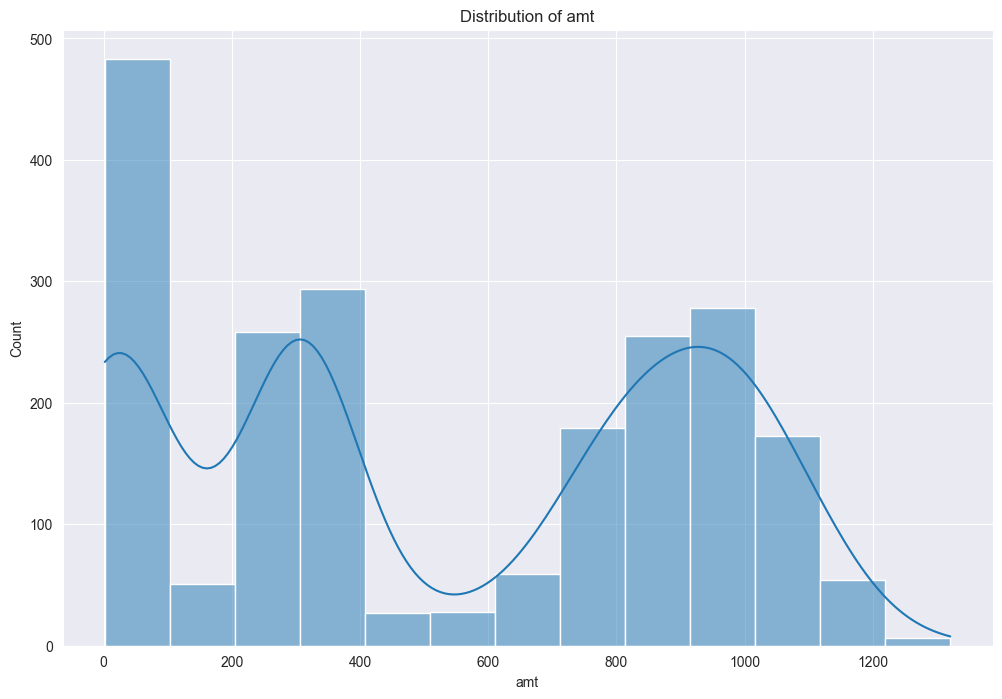

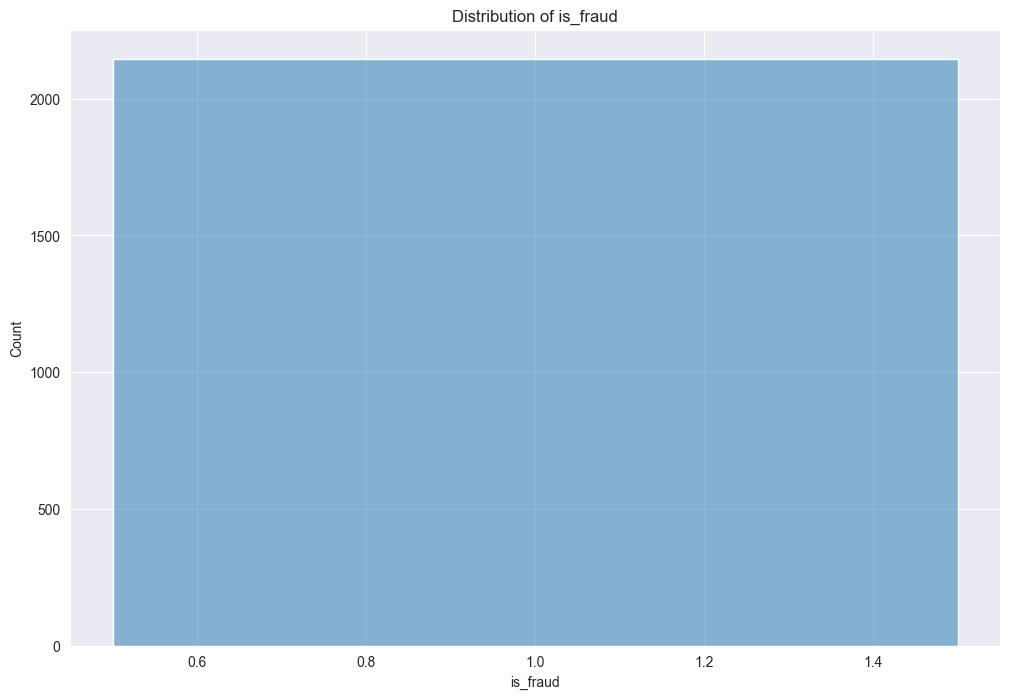

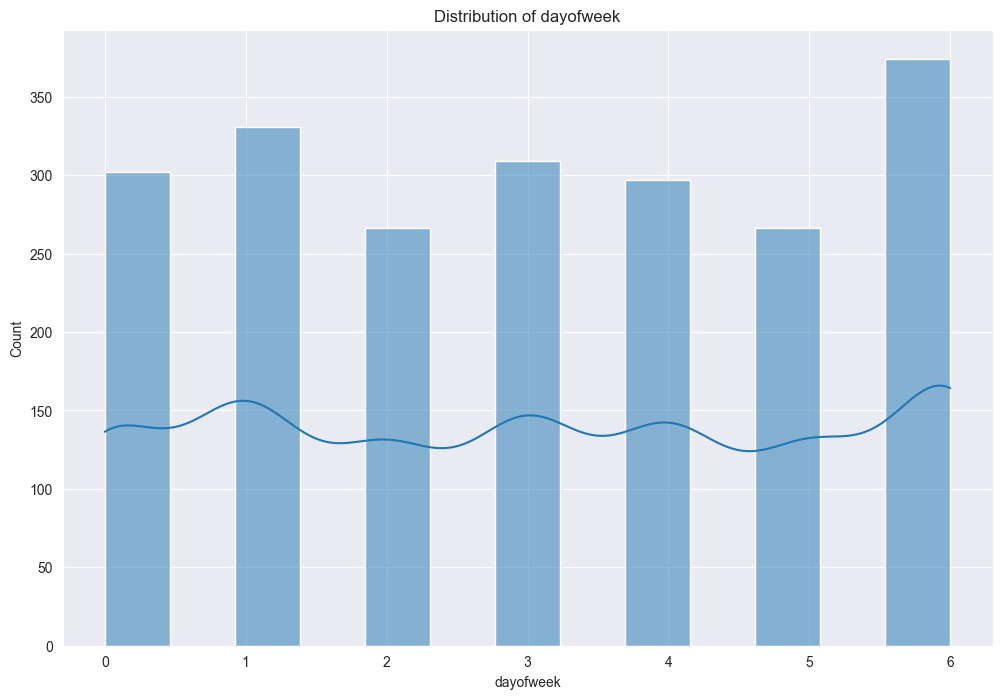

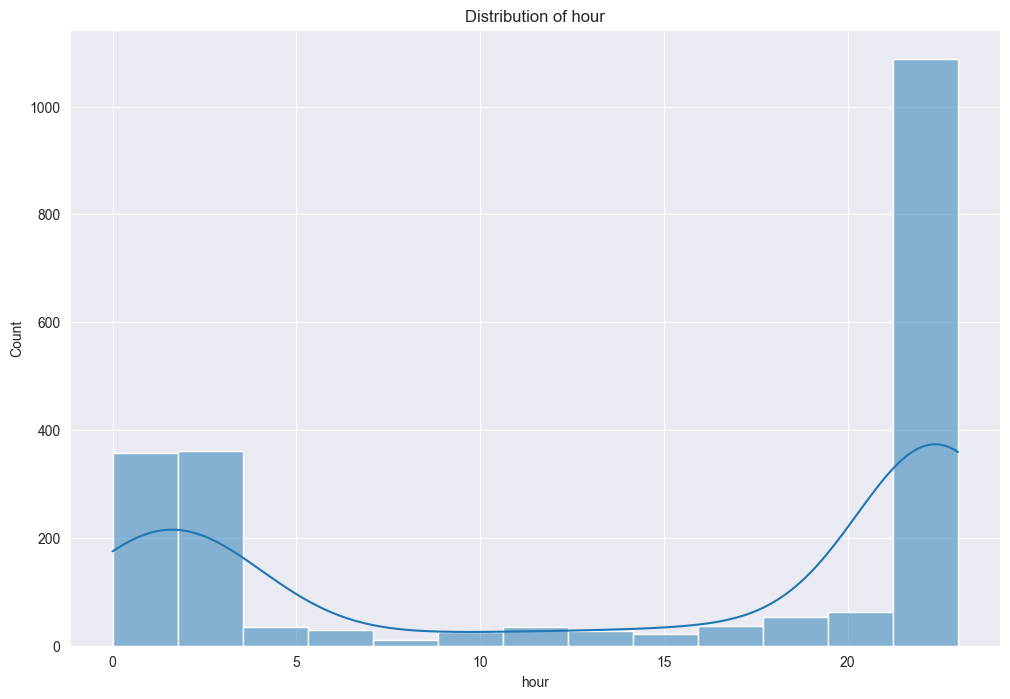

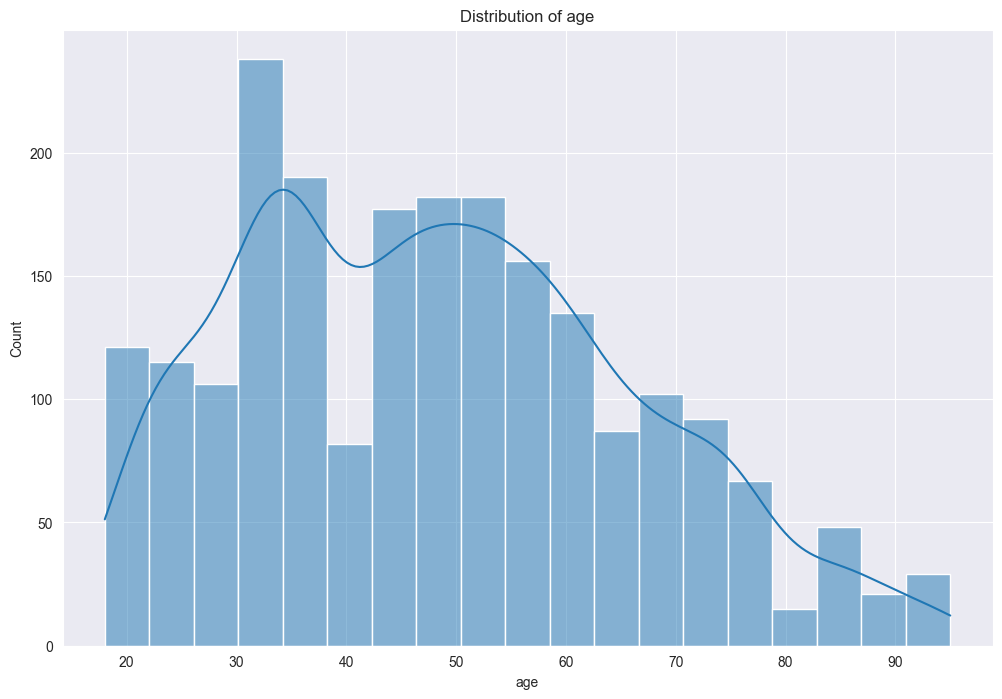

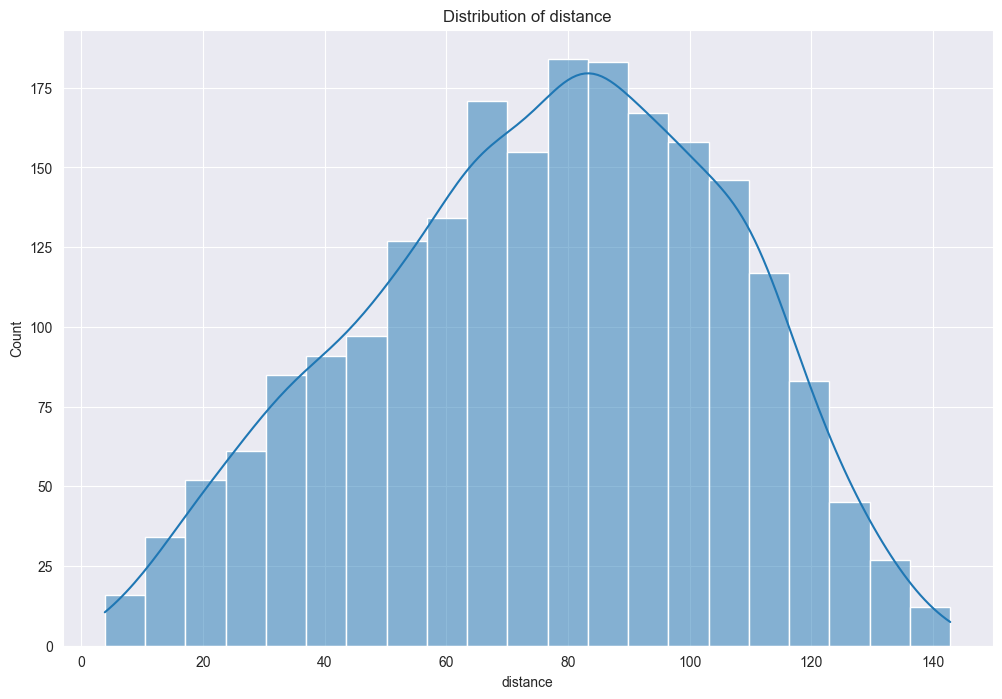

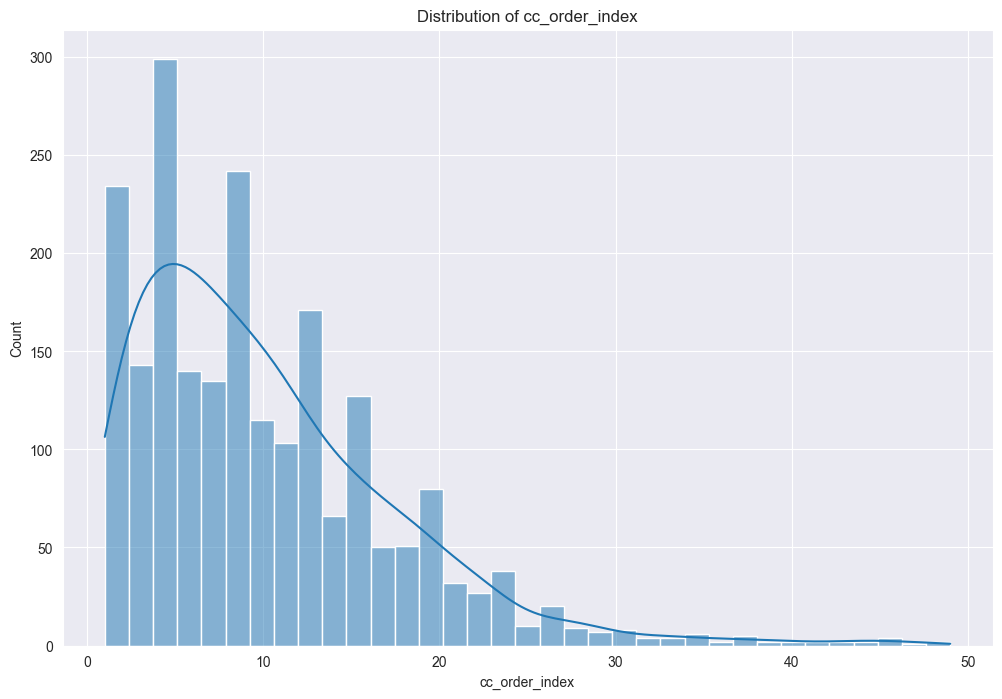

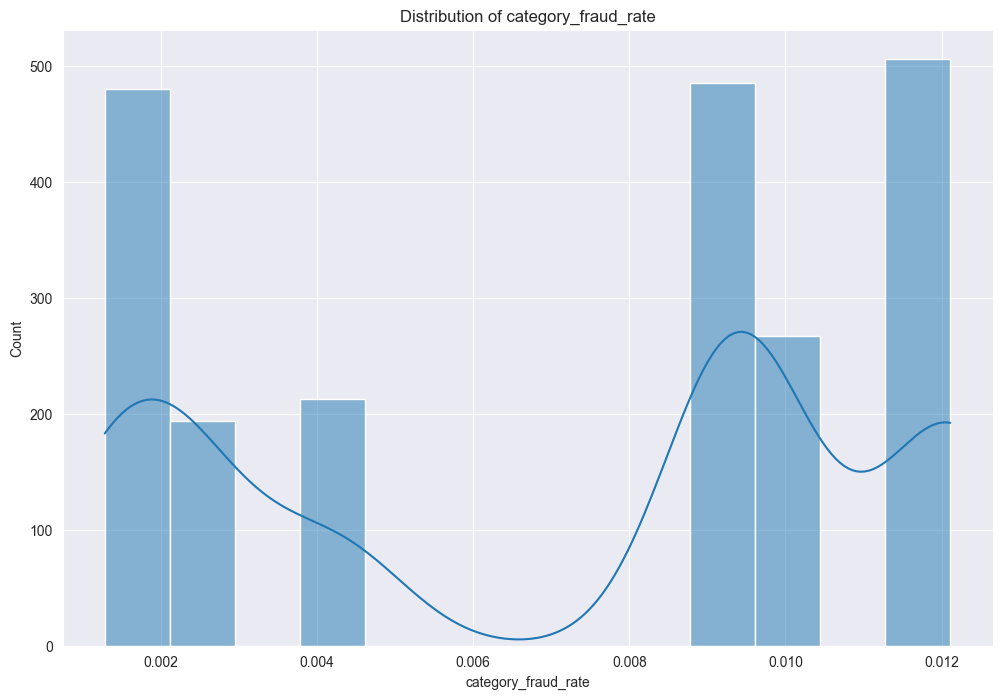

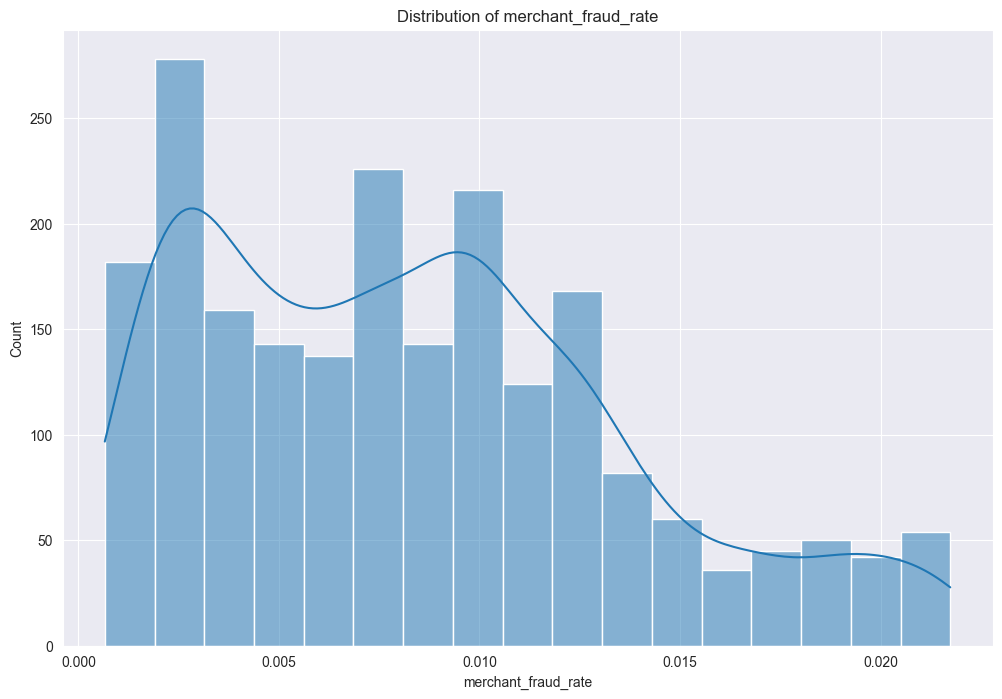

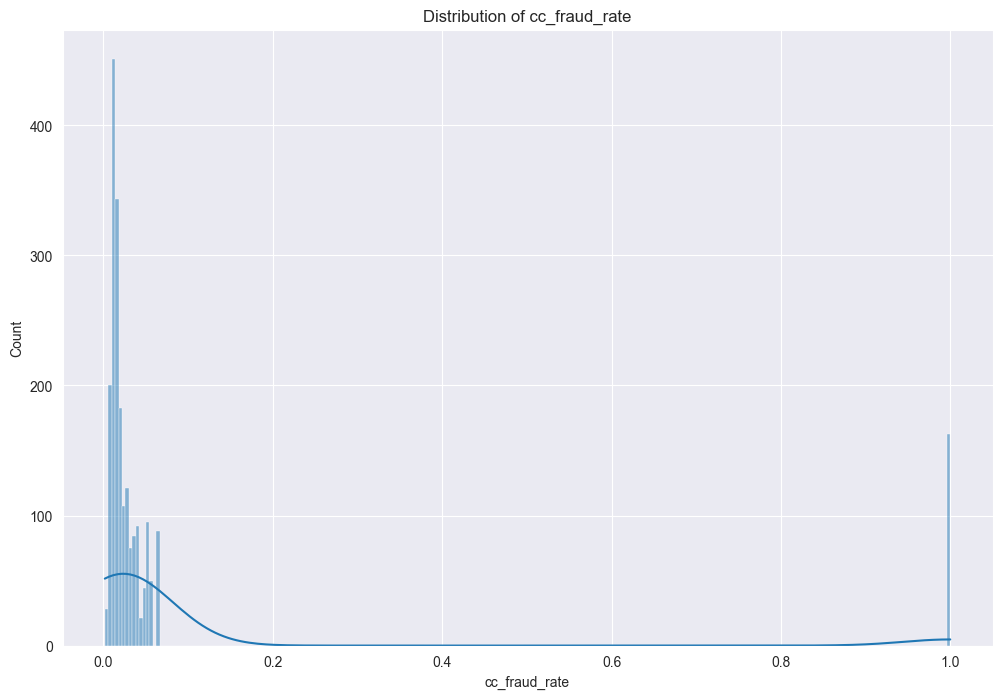

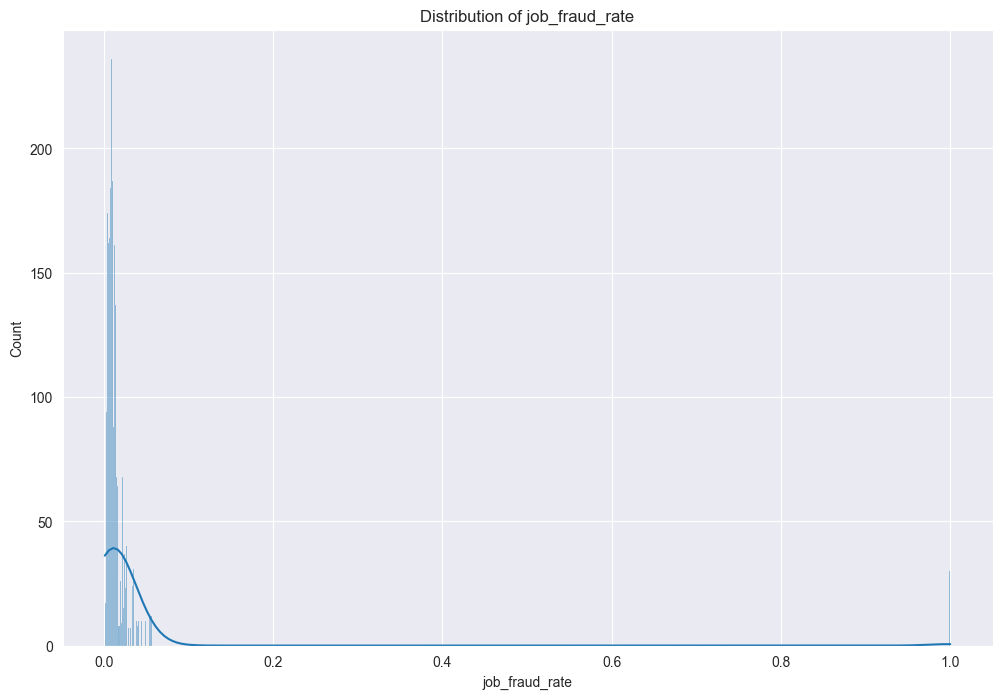

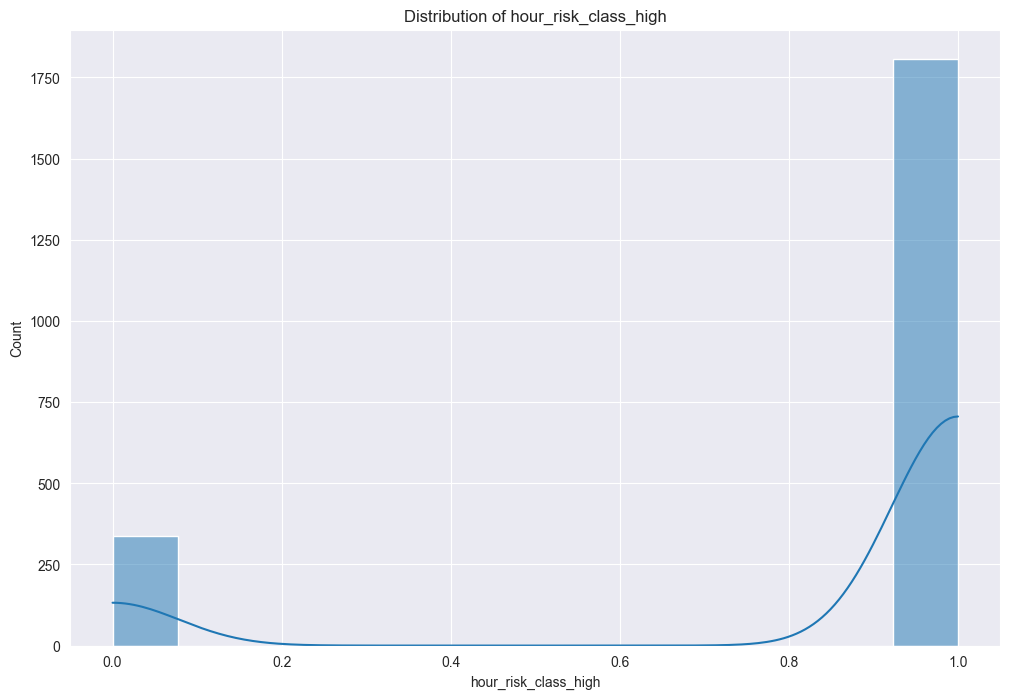

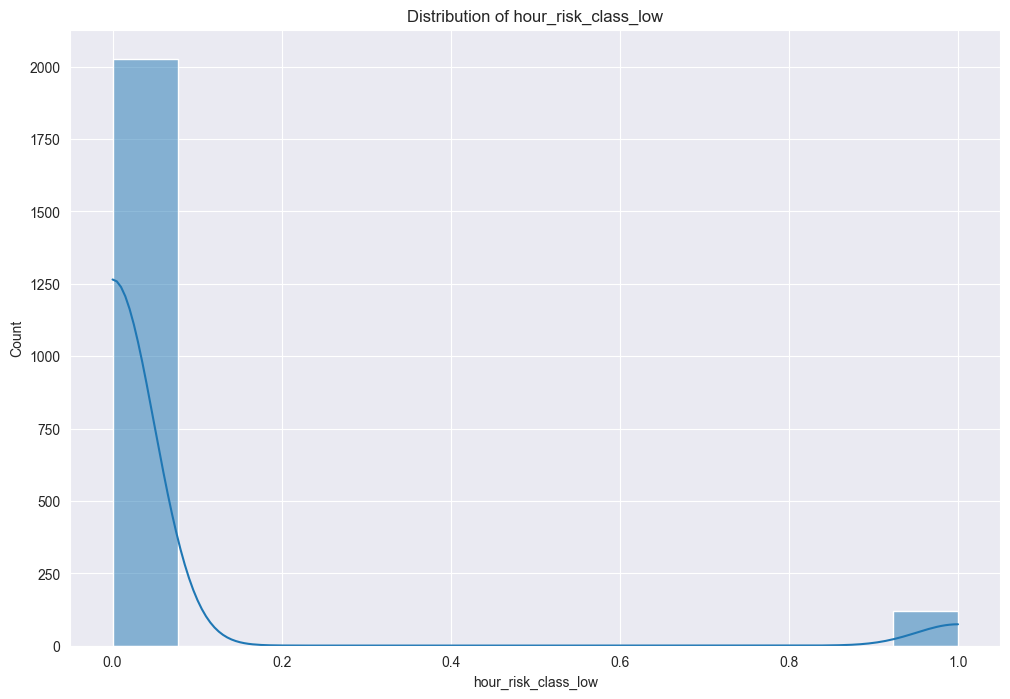

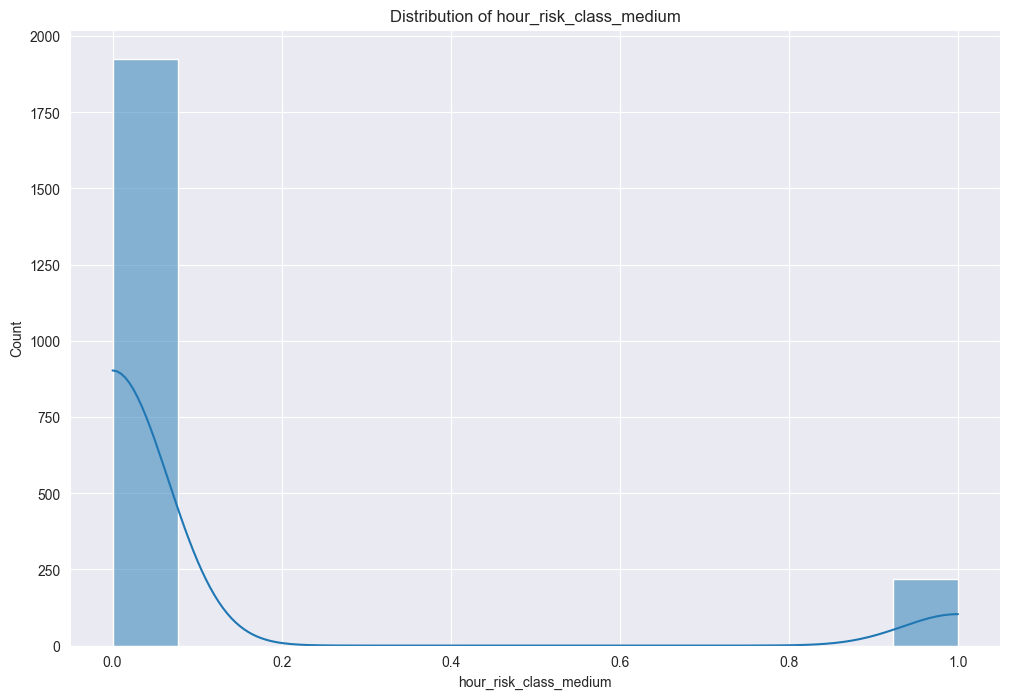

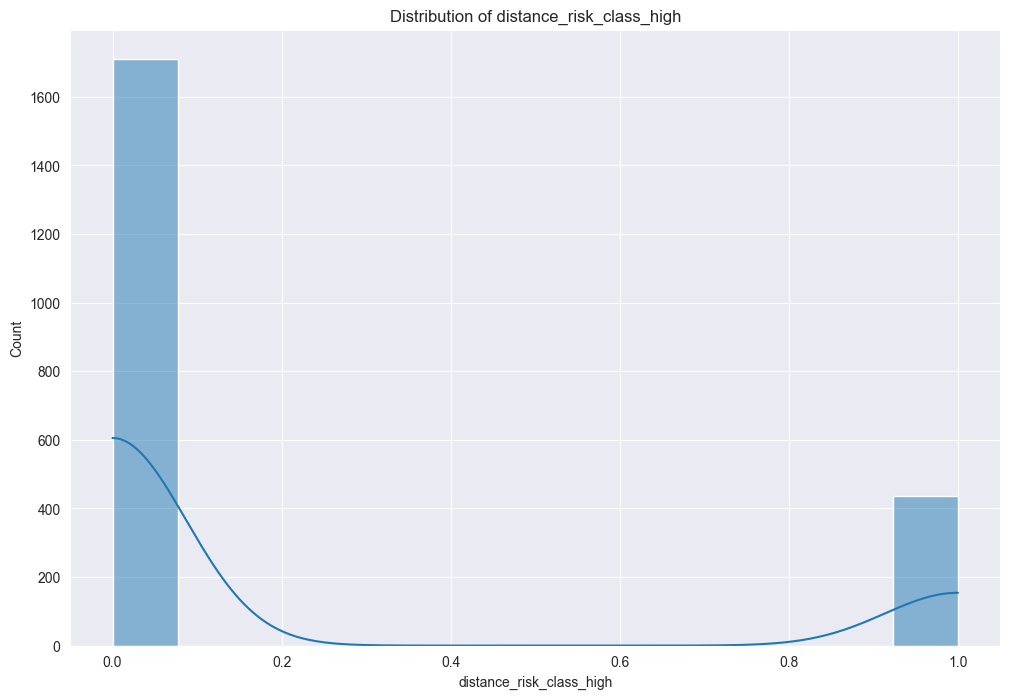

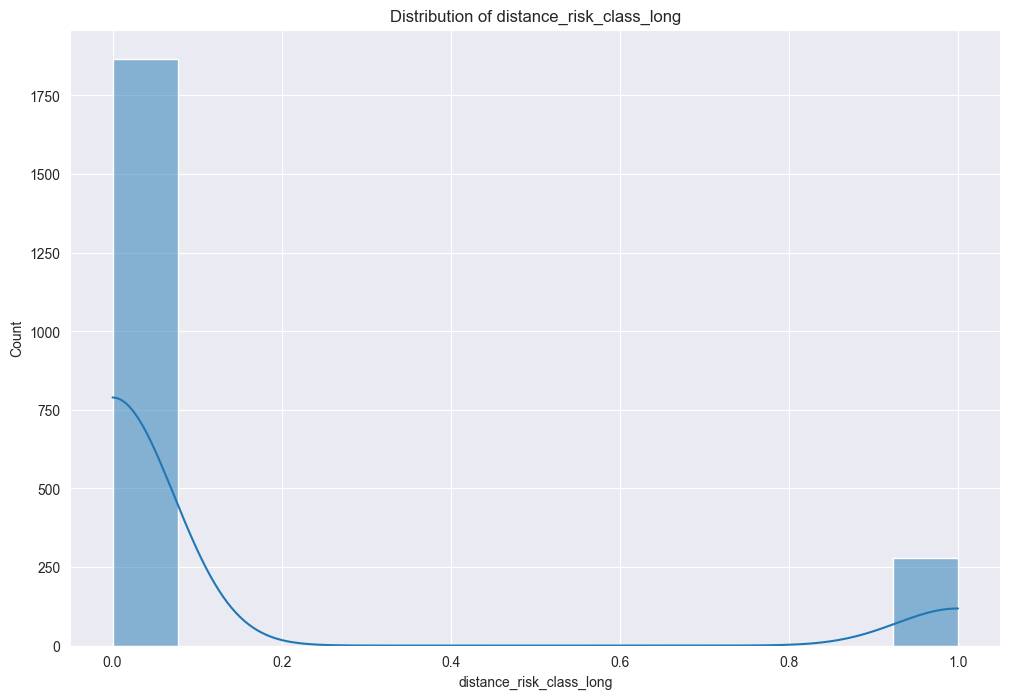

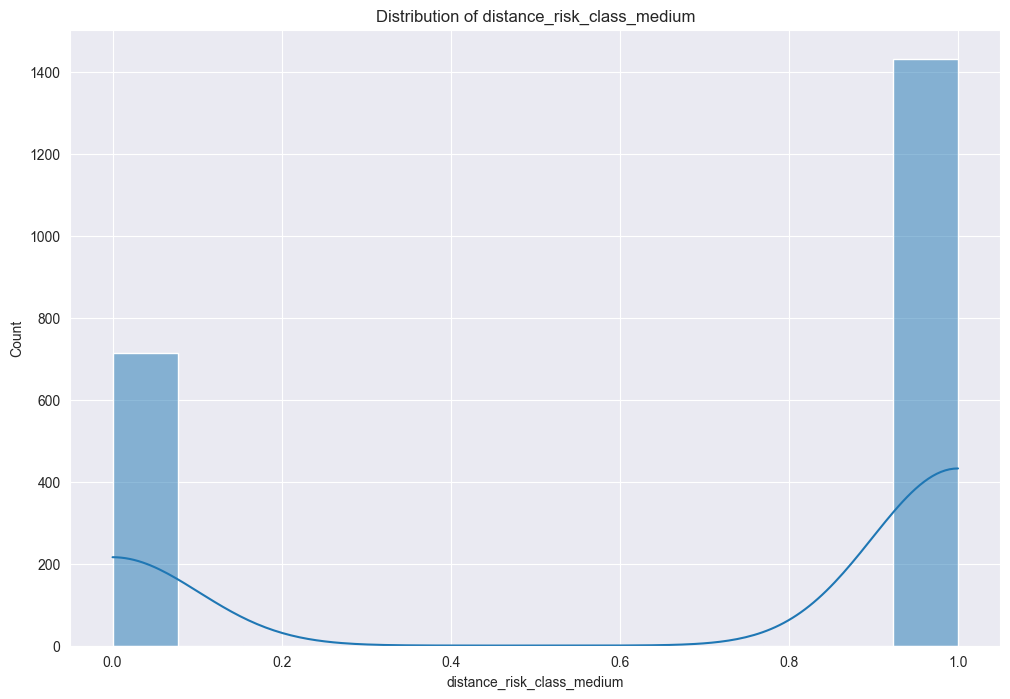

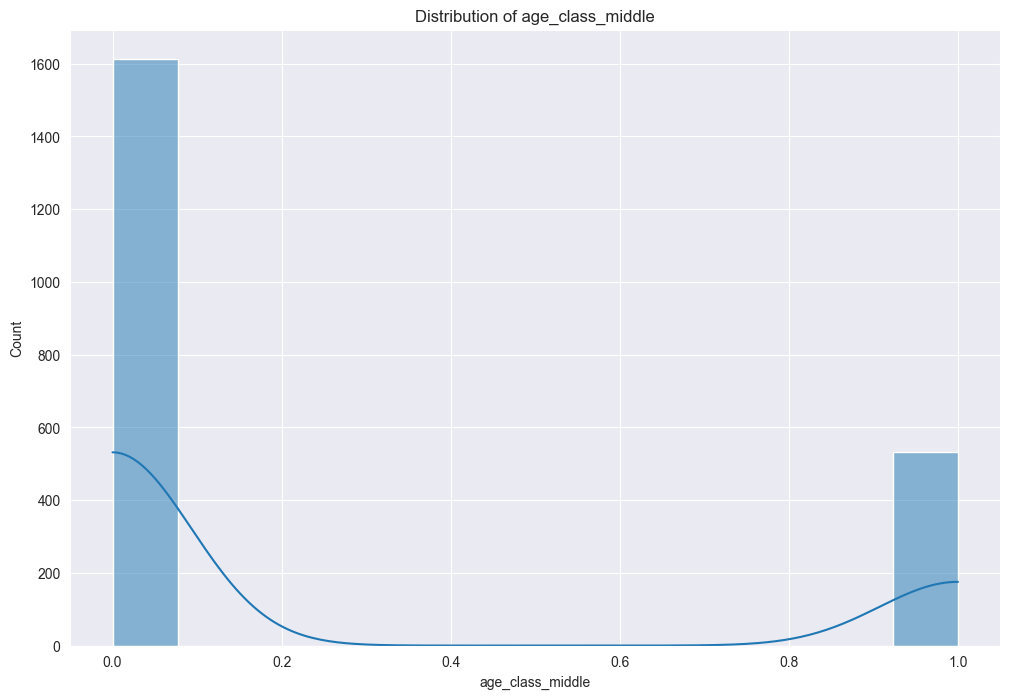

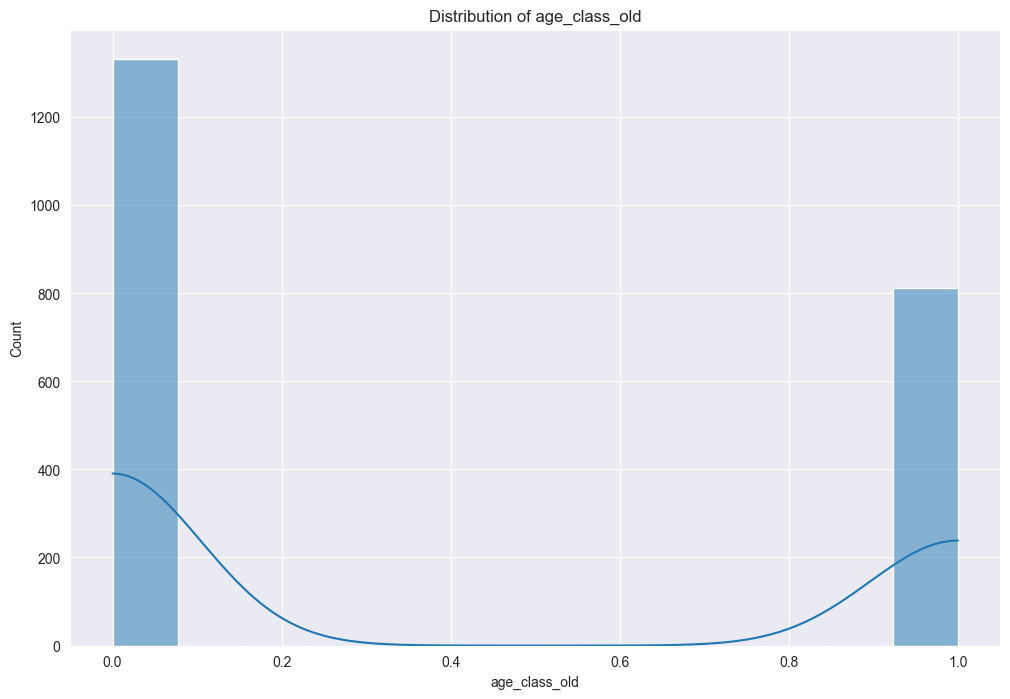

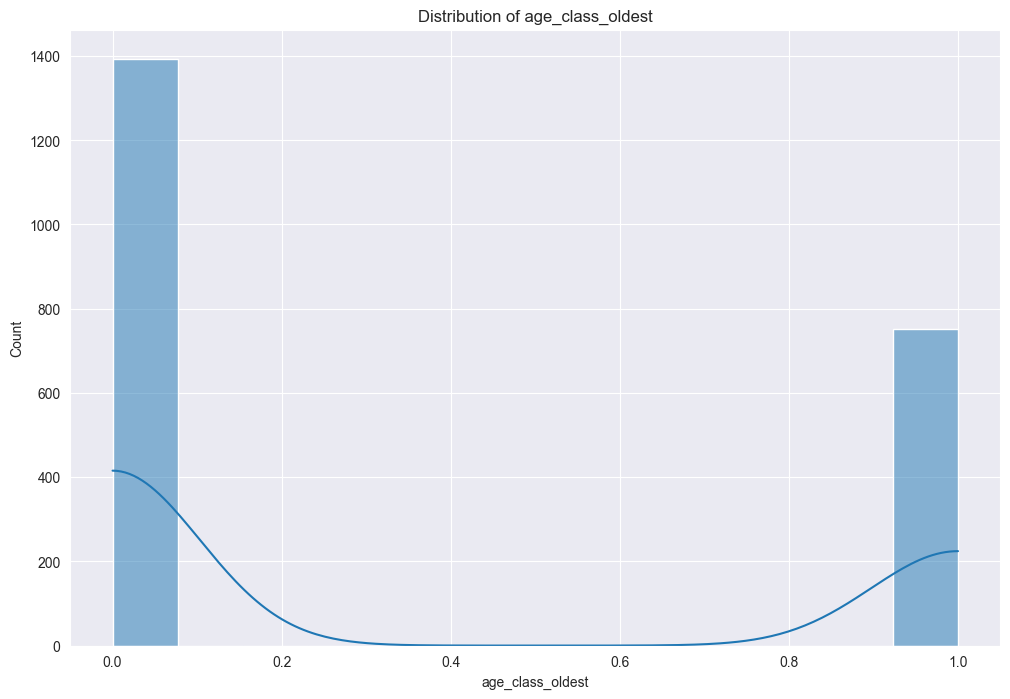

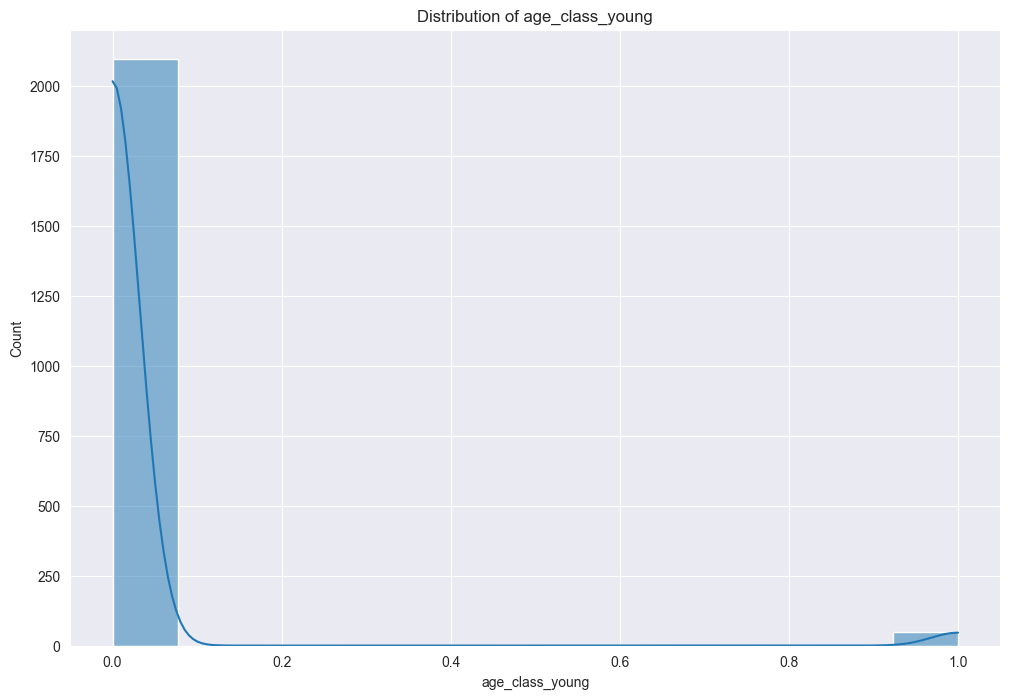

In [26]:
fraud_data = parsed_data[parsed_data['is_fraud'] == 1]

for col in fraud_data.select_dtypes(exclude=['object']).columns:
    with sns.axes_style('darkgrid'):
        fig, ax = plt.subplots(1, 1, figsize=(12, 8)) 
        sns.histplot(data=fraud_data, x=col, kde=True, ax=ax)
        plt.title(f"Distribution of {col}")  
        plt.show()

In [21]:
parsed_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 21 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   amt                         555719 non-null  float64
 1   is_fraud                    555719 non-null  int64  
 2   dayofweek                   555719 non-null  int32  
 3   hour                        555719 non-null  int32  
 4   age                         555719 non-null  int64  
 5   distance                    555719 non-null  float64
 6   cc_order_index              555719 non-null  int64  
 7   category_fraud_rate         555719 non-null  float64
 8   merchant_fraud_rate         555719 non-null  float64
 9   cc_fraud_rate               555719 non-null  float64
 10  job_fraud_rate              555719 non-null  float64
 11  hour_risk_class_high        555719 non-null  int32  
 12  hour_risk_class_low         555719 non-null  int32  
 13  hour_risk_clas

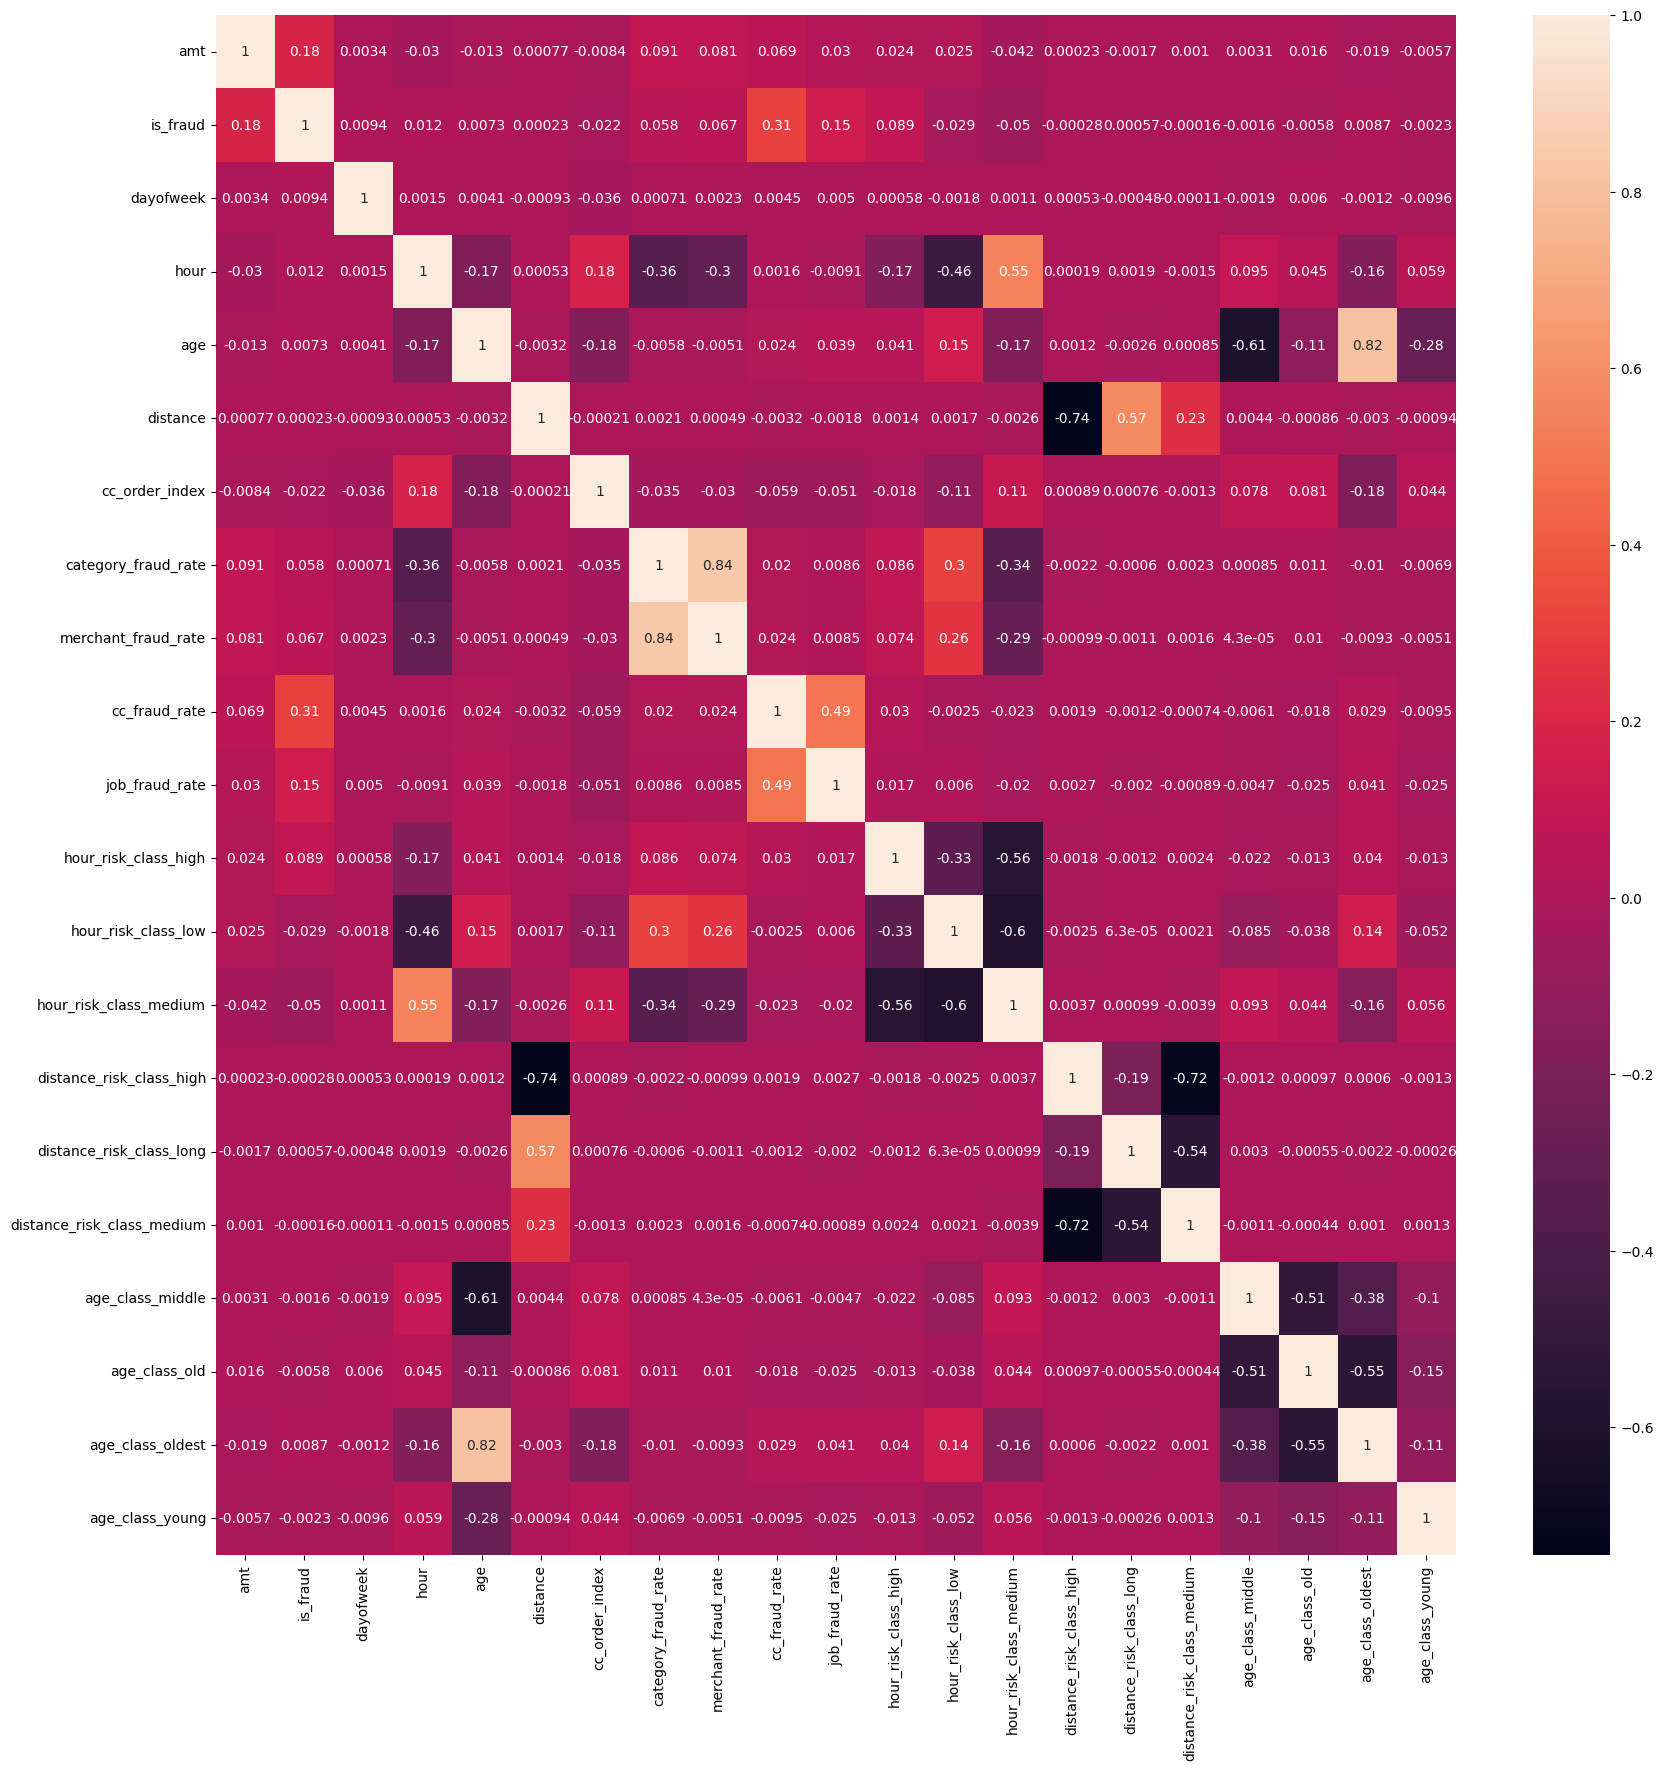

In [22]:
corr = parsed_data.corr()
plt.subplots(figsize=(20, 20))
sns.heatmap(corr, annot=True)
plt.show()

In [27]:
!pip install mlxtend

   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   -- ------------------------------------- 0.1/1.4 MB 4.5 MB/s eta 0:00:01
   ---- ----------------------------------- 0.2/1.4 MB 2.1 MB/s eta 0:00:01
   ------- -------------------------------- 0.3/1.4 MB 2.1 MB/s eta 0:00:01
   ---------- ----------------------------- 0.4/1.4 MB 2.1 MB/s eta 0:00:01
   ------------ --------------------------- 0.5/1.4 MB 2.0 MB/s eta 0:00:01
   ---------------- ----------------------- 0.6/1.4 MB 2.2 MB/s eta 0:00:01
   ----------------- ---------------------- 0.6/1.4 MB 2.1 MB/s eta 0:00:01
   --------------------- ------------------ 0.8/1.4 MB 2.1 MB/s eta 0:00:01
   ----------------------- ---------------- 0.8/1.4 MB 2.1 MB/s eta 0:00:01
   ------------------------- -------------- 0.9/1.4 MB 2.1 MB/s eta 0:00:01
   -------------------------- ------------- 1.0/1.4 MB 2.1 MB/s eta 0:00:01
   -----------------------


[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [28]:
from mlxtend.preprocessing import minmax_scaling
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler

In [ ]:
features  = parsed_data.drop(columns=['is_fraud'])
target    = parsed_data['is_fraud']

In [ ]:
features_scaled = minmax_scaling(features, columns=features.columns)

rob_scaler = RobustScaler()
features_scaled = rob_scaler.fit_transform(features_scaled)

sta_scaler = StandardScaler()
features_scaled = sta_scaler.fit_transform(features)

In [ ]:
features

,amt,dayofweek,hour,age,distance,cc_order_index,category_fraud_rate,merchant_fraud_rate,cc_fraud_rate,job_fraud_rate,hour_risk_class_high,hour_risk_class_low,hour_risk_class_medium,distance_risk_class_high,distance_risk_class_long,distance_risk_class_medium,age_class_middle,age_class_old,age_class_oldest,age_class_young
0,4.97,1,0,30,78.597568,1,0.014458,0.014207,0.000000,0.001693,1,0,0,0,0,1,1,0,0,0
1,107.23,1,0,40,30.212176,1,0.014098,0.010787,0.000000,0.002157,1,0,0,1,0,0,0,1,0,0
2,220.11,1,0,56,108.206083,1,0.002478,0.002111,0.000000,0.015656,1,0,0,0,0,1,0,0,1,0
3,45.00,1,0,51,95.673231,1,0.004694,0.003444,0.030426,0.007905,1,0,0,0,0,1,0,1,0,0
4,41.96,1,0,32,77.556744,1,0.003139,0.003769,0.000000,0.000000,1,0,0,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,15.56,6,12,58,119.752136,62,0.002478,0.002622,0.005948,0.005338,0,0,1,0,1,0,0,0,1,0
1296671,51.70,6,12,40,75.104085,14,0.001651,0.002284,0.015066,0.015066,0,0,1,0,0,1,0,1,0,0
1296672,105.93,6,12,52,99.047734,69,0.001651,0.001079,0.005314,0.006103,0,0,1,0,0,1,0,1,0,0
1296673,74.90,6,12,39,84.627652,54,0.001651,0.002094,0.003953,0.003953,0,0,1,0,0,1,0,1,0,0


In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix
from sklearn.utils import class_weight


In [ ]:
class_weights = class_weight.compute_class_weight('balanced',
                                                 classes=np.unique(target),
                                                 y=target)
class_weights

array([ 0.50291118, 86.37589928])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(features_scaled, target, test_size = 0.2, random_state = 25)

In [ ]:
def modeling_xgboost(X_train, y_train):
  model = XGBClassifier(
    objective='binary:logistic',  # For binary classification
    eval_metric='logloss'          # Evaluation metric to monitor during training
  )

  model.fit(X_train, y_train)

  return model

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
def modeling_adaboost(X_train, y_train):
  model = AdaBoostClassifier(n_estimators=100)
  model.fit(X_train, y_train)
  return model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import tensorflow as tf
from keras import backend as K
import random

# Set seeds
np.random.seed(42)
tf.random.set_seed(42)
random.seed(42)

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))


def modeling_mlp(X_train, y_train):
  model = Sequential()
  model.add(Dense(32, activation=tf.keras.layers.LeakyReLU(alpha=0.01), input_shape=[len(features.keys())]))
  model.add(Dense(16, activation=tf.keras.layers.LeakyReLU(alpha=0.01)))
  model.add(Dense(16, activation=tf.keras.layers.LeakyReLU(alpha=0.0125)))
  model.add(Dense(8, activation=tf.keras.layers.LeakyReLU(alpha=0.0125)))
  model.add(Dense(8, activation=tf.keras.layers.LeakyReLU(alpha=0.015)))
  model.add(Dense(4, activation=tf.keras.layers.LeakyReLU(alpha=0.015)))
  model.add(Dense(4, activation=tf.keras.layers.LeakyReLU(alpha=0.015)))
  model.add(Dense(1, activation='sigmoid'))

  model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy', f1_m, precision_m, recall_m])
  history = model.fit(X_train, y_train, epochs=1000, batch_size=20000, validation_split=0.2, verbose=0)

  return model, history

In [ ]:
from sklearn.linear_model import LogisticRegression
def modeling_logistic(X_train, y_train):
  model = LogisticRegression(solver='saga',penalty='l1', C=0.1)
  model.fit(X_train, y_train)
  return model

In [ ]:
from sklearn.ensemble import RandomForestClassifier
def modeling_randomforest(X_train, y_train):
  model = RandomForestClassifier(n_estimators=100, random_state=42)
  model.fit(X_train, y_train)
  return model

In [ ]:
def max_metric(history):
  max_precission = max(history.history['precision_m'])
  max_recall = max(history.history['recall_m'])
  max_f1 = max(history.history['f1_m'])
  max_val_precission = max(history.history['val_precision_m'])
  max_val_recall = max(history.history['val_recall_m'])
  max_val_f1 = max(history.history['val_f1_m'])

  print('max_precission -',max_precission)
  print('max_recall -',max_recall)
  print('max_f1 -',max_f1)
  print('max_val_precission -',max_val_precission)
  print('max_val_recall -',max_val_recall)
  print('max_val_f1 -',max_val_f1)

def evaluate_model_mlp(model,X_test, y_test):
  y_pred_prob = model.predict(X_test)
  threshold = 0.5
  y_pred = (y_pred_prob >= threshold).astype(int)
  print(classification_report(y_test, y_pred))

  confusion_mtx = confusion_matrix(y_test, y_pred)
  f,ax = plt.subplots(figsize=(6, 6))
  sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="Greens",linecolor="gray", fmt= '.1f',ax=ax)
  plt.xlabel("Predicted Label")
  plt.ylabel("True Label")
  plt.title("Confusion Matrix")
  plt.show()

  return classification_report(y_test, y_pred), confusion_mtx

In [ ]:
def evaluate_model(model,X_test, y_test):
  y_pred = model.predict(X_test)
  print(classification_report(y_test, y_pred))

  confusion_mtx = confusion_matrix(y_test, y_pred)
  f,ax = plt.subplots(figsize=(6, 6))
  sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="Greens",linecolor="gray", fmt= '.1f',ax=ax)
  plt.xlabel("Predicted Label")
  plt.ylabel("True Label")
  plt.title("Confusion Matrix")
  plt.show()

  return classification_report(y_test, y_pred), confusion_mtx

In [ ]:
def train_and_evaluate(features_train, target_train):
  print("------ MLP Modeling -------")
  print("------ Modeling -------")
  mlp_modeling , history = modeling_mlp(features_train, target_train)
  print("------ Train Evaluate -------")
  evaluate_model_mlp(mlp_modeling,features_train, target_train)
  print("------ Test Evaluate -------")
  mlp_classification_report,mlp_confusion_mtx = evaluate_model_mlp(mlp_modeling,X_test, y_test)
  print("--------------------------------\n\n\n")



  print("------ XG Boost Modeling -------")
  print("------ Modeling -------")
  XGB_model = modeling_xgboost(features_train, target_train)
  print("------ Train Evaluate -------")
  evaluate_model(XGB_model,features_train, target_train)
  print("------ Test Evaluate -------")
  xgb_classification_report,xgb_confusion_mtx = evaluate_model(XGB_model,X_test, y_test)
  print("--------------------------------\n\n\n")



  print("------ Logistic Regression Modeling -------")
  print("------ Modeling -------")
  log_model = modeling_logistic(features_train, target_train)
  print("------ Train Evaluate -------")
  evaluate_model(log_model,features_train, target_train)
  print("------ Test Evaluate -------")
  log_classification_report,log_confusion_mtx = evaluate_model(log_model,X_test, y_test)
  print("--------------------------------\n\n\n")



  print("------ Random Forest Modeling -------")
  print("------ Modeling -------")
  rf_model = modeling_randomforest(features_train, target_train)
  print("------ Train Evaluate -------")
  evaluate_model(rf_model,features_train, target_train)
  print("------ Test Evaluate -------")
  rf_classification_report,rf_confusion_mtx = evaluate_model(rf_model,X_test, y_test)
  print("--------------------------------\n\n\n")

  return {
      "mlp":{
          "model": mlp_modeling,
          "classification_report": mlp_classification_report,
          "confusion_mtx": mlp_confusion_mtx
      },
      "xgb":{
          "model": XGB_model,
          "classification_report": xgb_classification_report,
          "confusion_mtx": xgb_confusion_mtx
      },
      "log":{
          "model": log_model,
          "classification_report": log_classification_report,
          "confusion_mtx": log_confusion_mtx
      },
      "rf":{
          "model": rf_model,
          "classification_report": rf_classification_report,
          "confusion_mtx": rf_confusion_mtx
      }
  }

------ MLP Modeling -------
------ Modeling -------
------ Train Evaluate -------
32417/32417 [==============================] - 50s 2ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1031302
           1       0.91      0.80      0.85      6038

    accuracy                           1.00   1037340
   macro avg       0.96      0.90      0.92   1037340
weighted avg       1.00      1.00      1.00   1037340



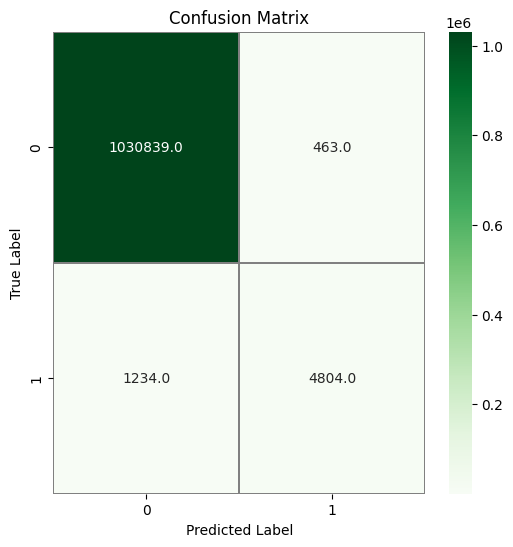

------ Test Evaluate -------
8105/8105 [==============================] - 13s 2ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    257867
           1       0.87      0.77      0.82      1468

    accuracy                           1.00    259335
   macro avg       0.94      0.89      0.91    259335
weighted avg       1.00      1.00      1.00    259335



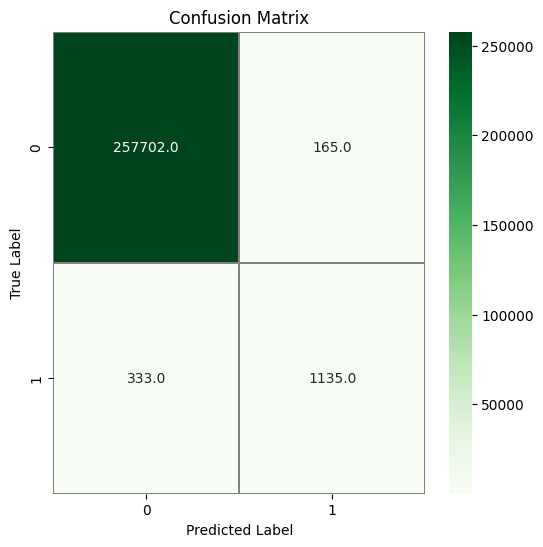

--------------------------------



------ XG Boost Modeling -------
------ Modeling -------
------ Train Evaluate -------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1031302
           1       0.98      0.89      0.93      6038

    accuracy                           1.00   1037340
   macro avg       0.99      0.95      0.97   1037340
weighted avg       1.00      1.00      1.00   1037340



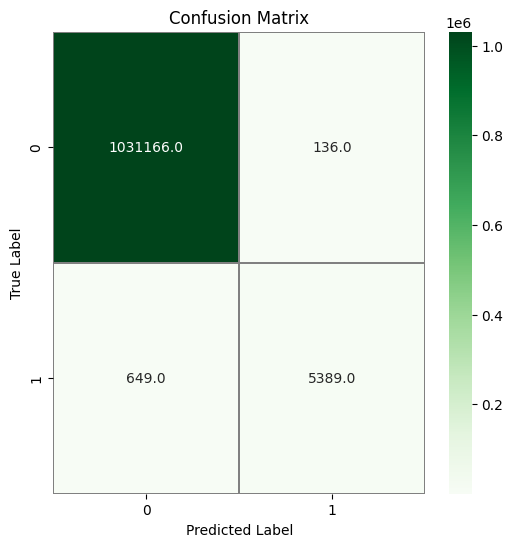

------ Test Evaluate -------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    257867
           1       0.94      0.85      0.89      1468

    accuracy                           1.00    259335
   macro avg       0.97      0.92      0.94    259335
weighted avg       1.00      1.00      1.00    259335



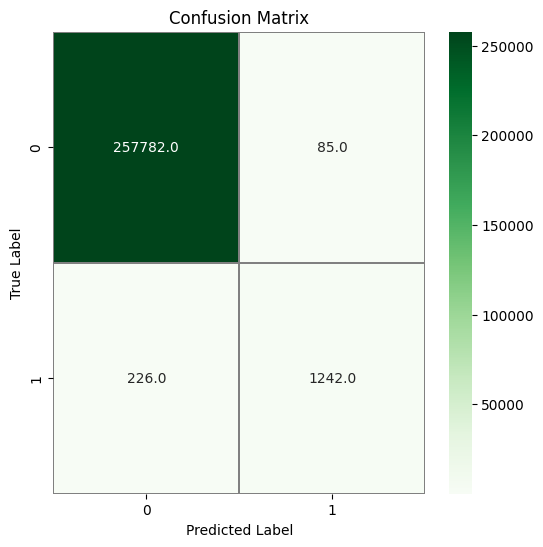

--------------------------------



------ Logistic Regression Modeling -------
------ Modeling -------


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


------ Train Evaluate -------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1031302
           1       0.76      0.18      0.29      6038

    accuracy                           0.99   1037340
   macro avg       0.88      0.59      0.64   1037340
weighted avg       0.99      0.99      0.99   1037340



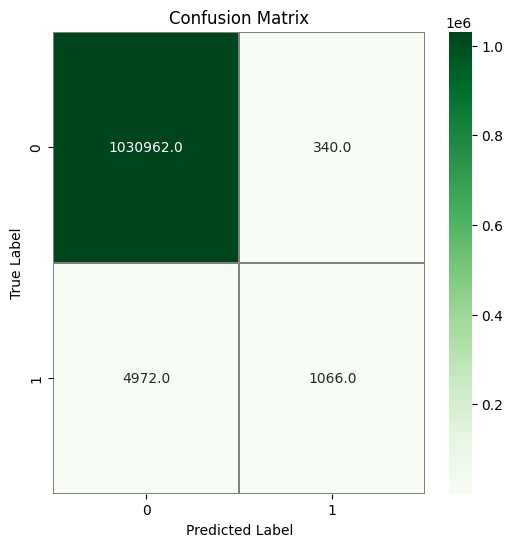

------ Test Evaluate -------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    257867
           1       0.78      0.20      0.32      1468

    accuracy                           1.00    259335
   macro avg       0.89      0.60      0.66    259335
weighted avg       0.99      1.00      0.99    259335



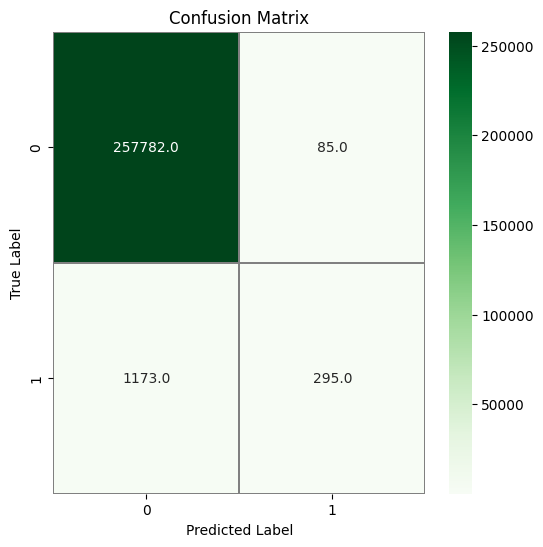

--------------------------------



------ Random Forest Modeling -------
------ Modeling -------
------ Train Evaluate -------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1031302
           1       1.00      1.00      1.00      6038

    accuracy                           1.00   1037340
   macro avg       1.00      1.00      1.00   1037340
weighted avg       1.00      1.00      1.00   1037340



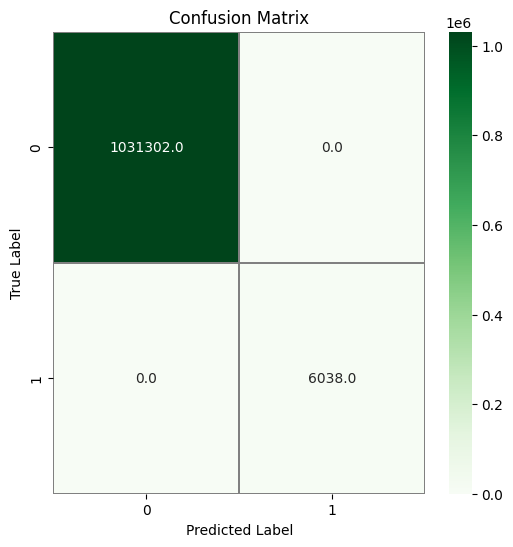

------ Test Evaluate -------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    257867
           1       0.95      0.75      0.84      1468

    accuracy                           1.00    259335
   macro avg       0.98      0.87      0.92    259335
weighted avg       1.00      1.00      1.00    259335



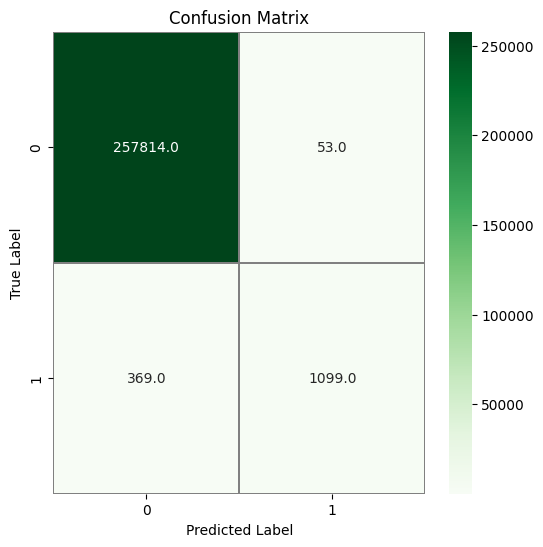

--------------------------------





In [ ]:
default_data_results = train_and_evaluate(X_train, y_train)